In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read In the data

In [2]:
df = pd.read_csv('../../Data/Merged_Data/cleaned_data.csv.zip')
df_with_sponsors = pd.read_csv('../../Data/Merged_Data/cleaned_data_with_sponsors.csv.zip')

# Target Variable

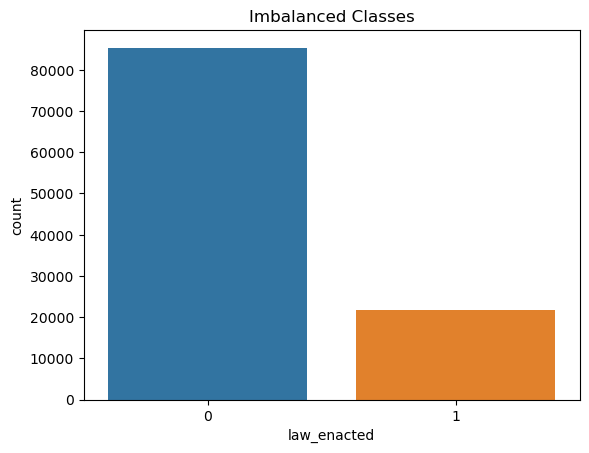

In [3]:
sns.countplot(data = df, x = 'law_enacted')
plt.title('Imbalanced Classes');

Most bills do not become law.

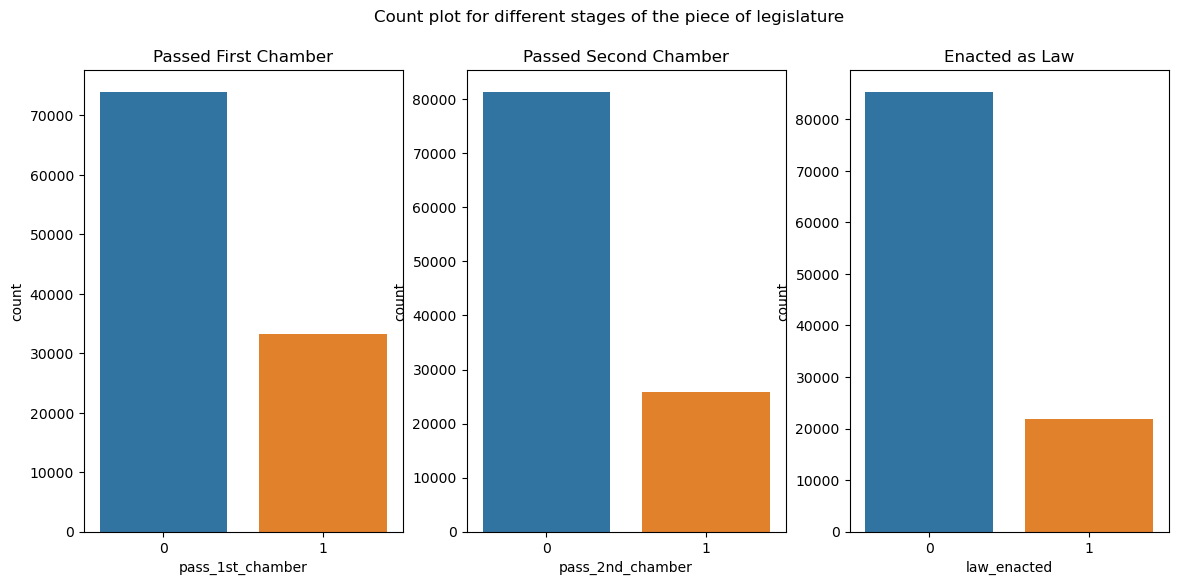

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

sns.countplot(ax = ax1, data = df, x = 'pass_1st_chamber')
ax1.set_title('Passed First Chamber')
sns.countplot(ax = ax2, data = df, x = 'pass_2nd_chamber')
ax2.set_title('Passed Second Chamber')
sns.countplot(ax = ax3, data = df, x = 'law_enacted')
ax3.set_title('Enacted as Law')

fig.set_figheight(6)
fig.set_figwidth(14)

fig.suptitle('Count plot for different stages of the piece of legislature');

It becomes less and less frequent for bills to pass.

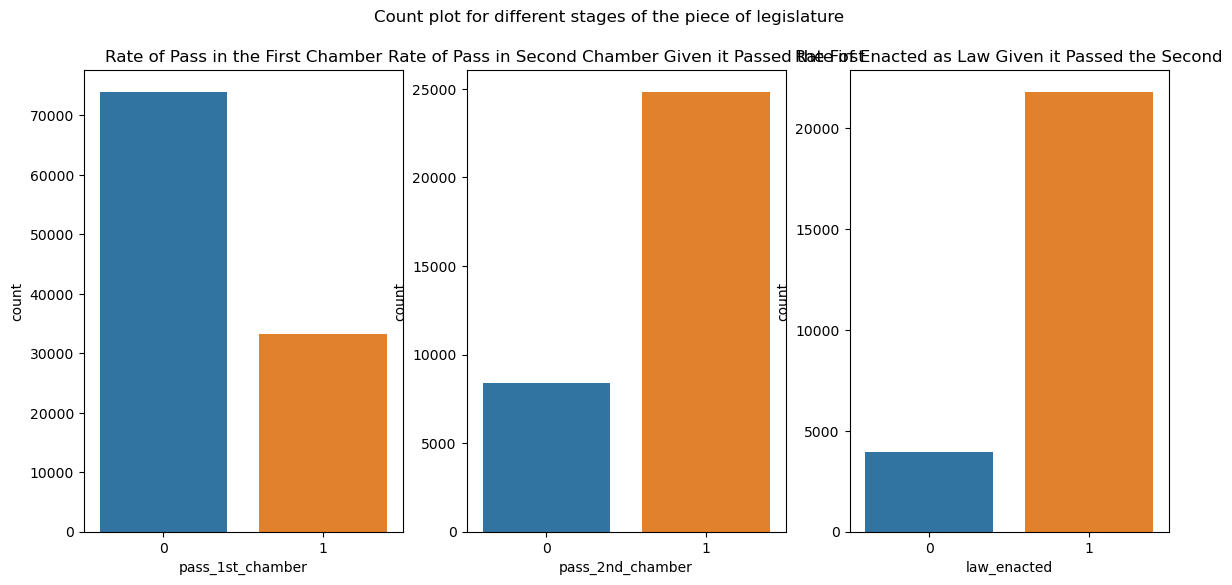

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

sns.countplot(ax = ax1, data = df, x = 'pass_1st_chamber')
ax1.set_title('Rate of Pass in the First Chamber')
sns.countplot(ax = ax2, data = df[df['pass_1st_chamber'] == 1], x = 'pass_2nd_chamber')
ax2.set_title('Rate of Pass in Second Chamber Given it Passed the First')
sns.countplot(ax = ax3, data = df[df['pass_2nd_chamber'] == 1], x = 'law_enacted')
ax3.set_title('Rate of Enacted as Law Given it Passed the Second')

fig.set_figheight(6)
fig.set_figwidth(14)

fig.suptitle('Count plot for different stages of the piece of legislature');

Although it is not the prettiest graph at the moment, it shows that once it passes the first chamber, it is more likely to be enacted than fail. The hardest stage to pass is the chamber it was introduced in.

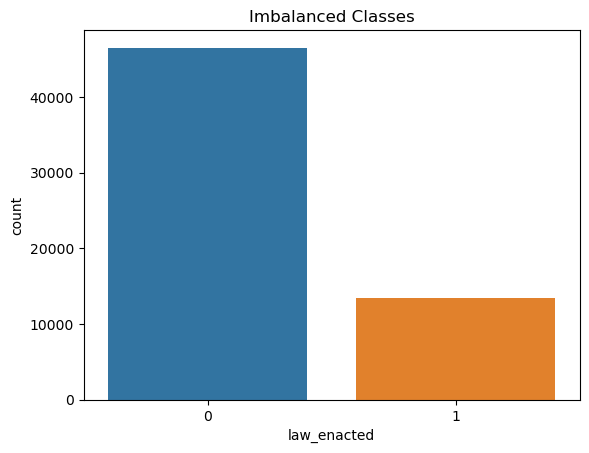

In [6]:
sns.countplot(data = df_with_sponsors, x = 'law_enacted')
plt.title('Imbalanced Classes');

Very similar result for the smaller subset data we have. 

# Features that do not need Word Count Vecotizer

## Classification

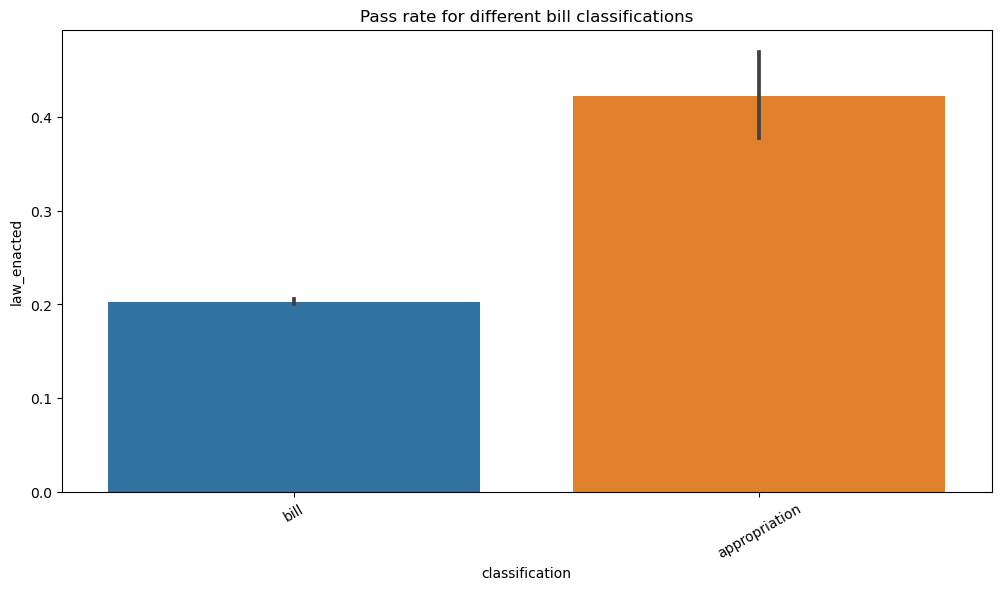

In [7]:
plt.figure(figsize = (12,6))
sns.barplot(data = df, x = 'classification', y = 'law_enacted')
plt.title('Pass rate for different bill classifications')
plt.xticks(rotation = 30); 

In [8]:
df['classification'].value_counts()

bill             106831
appropriation       402
Name: classification, dtype: int64

In [9]:
df.groupby('classification')['law_enacted'].mean()

classification
appropriation    0.422886
bill             0.202853
Name: law_enacted, dtype: float64

Although theses two classes of legislation have different pass rates, I do not think this would be a good feature for the model because there are so few observations for the "appropriation".

## State

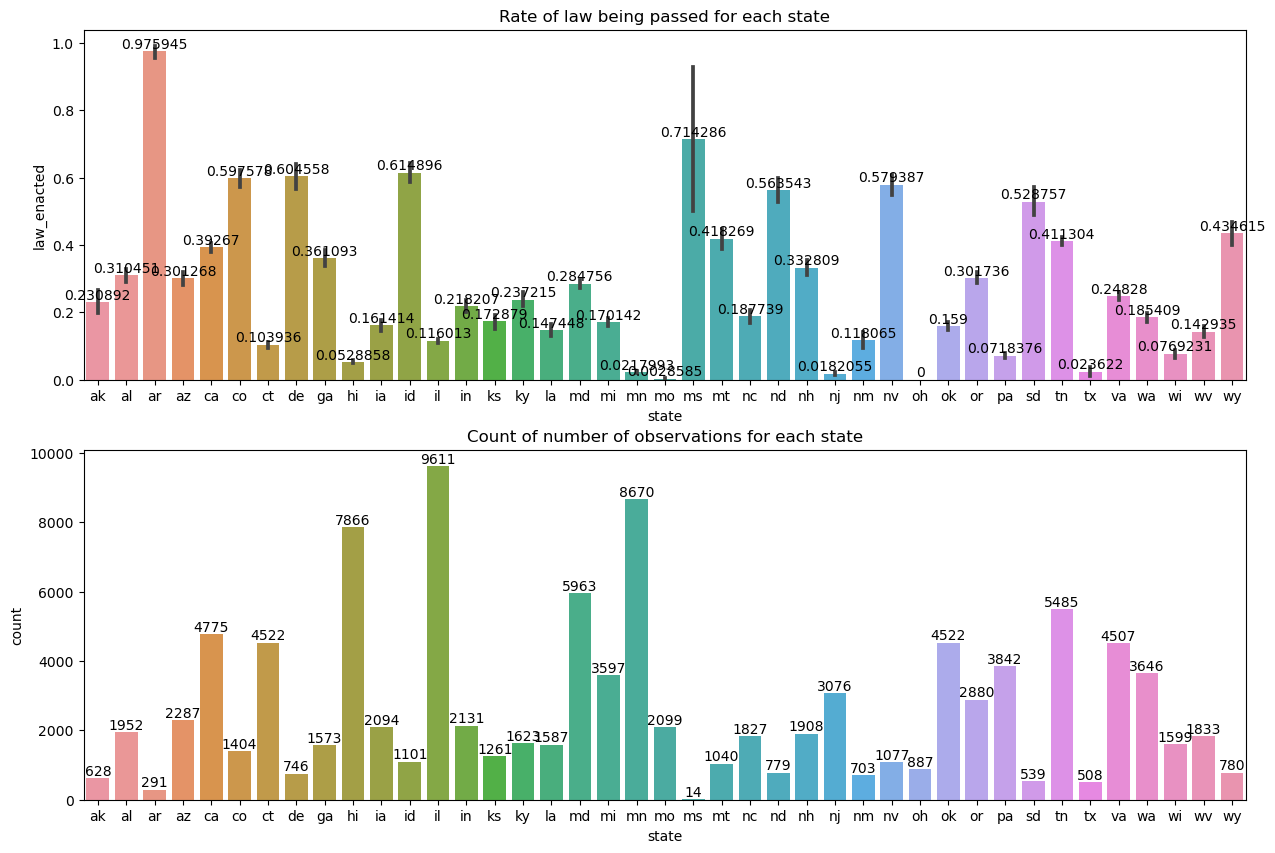

In [10]:
fig , (ax1,ax2) = plt.subplots(2,1)

sns.barplot(ax = ax1, data = df, x = 'state', y = 'law_enacted')
ax1.set_title('Rate of law being passed for each state')
ax1.bar_label(ax1.containers[0])

sns.countplot(ax = ax2, data = df, x = 'state')
ax2.bar_label(ax2.containers[0])
ax2.set_title('Count of number of observations for each state')

fig.set_figheight(10)
fig.set_figwidth(15)

States have very different rates of passing bills. In Ohio for example, 0% of the bills passed while in Arkansas, 97% of the bills pass. This may be because we have little observations from both those states.

Text(0.5, 0.98, 'Same graph as above but for smaller dataset')

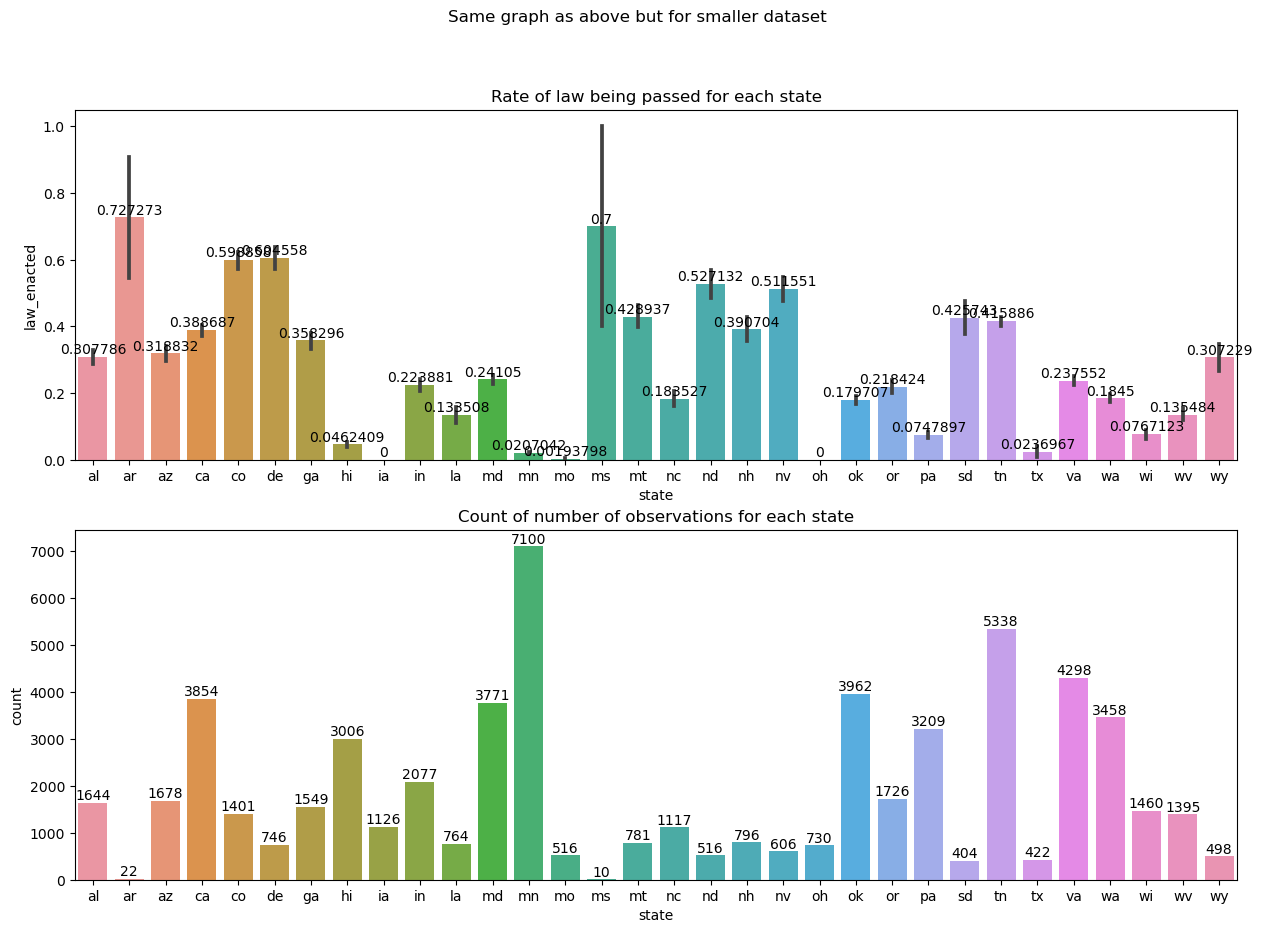

In [11]:
fig , (ax1,ax2) = plt.subplots(2,1)

sns.barplot(ax = ax1, data = df_with_sponsors, x = 'state', y = 'law_enacted')
ax1.set_title('Rate of law being passed for each state')
ax1.bar_label(ax1.containers[0])

sns.countplot(ax = ax2, data = df_with_sponsors, x = 'state')
ax2.bar_label(ax2.containers[0])
ax2.set_title('Count of number of observations for each state')

fig.set_figheight(10)
fig.set_figwidth(15)

fig.suptitle('Same graph as above but for smaller dataset')

## Organization Classifier

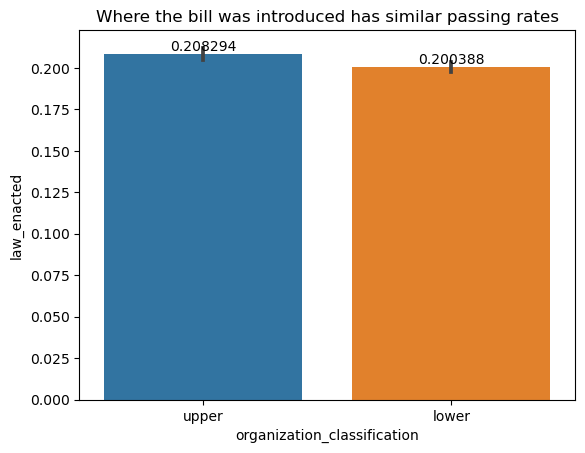

In [12]:
ax = sns.barplot(data = df, x = 'organization_classification', y = 'law_enacted')
ax.bar_label(ax.containers[0])
plt.title('Where the bill was introduced has similar passing rates');

More bills from the Senate become law, but the difference is marginal.

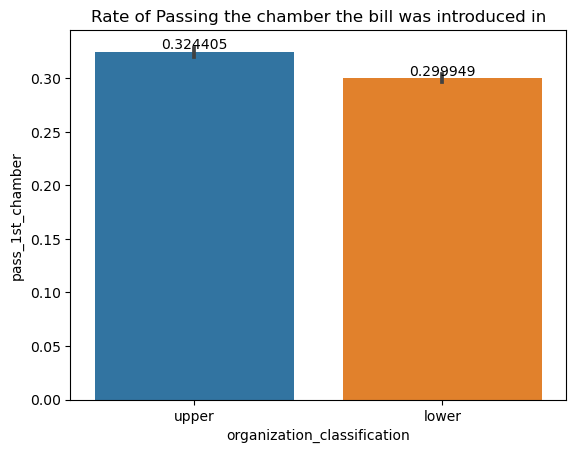

In [13]:
ax = sns.barplot(data = df, x = 'organization_classification', y = 'pass_1st_chamber')
ax.bar_label(ax.containers[0])
plt.title('Rate of Passing the chamber the bill was introduced in');

Bills introduced in the senate are more likely to pass stage one than bills introduced in the House.

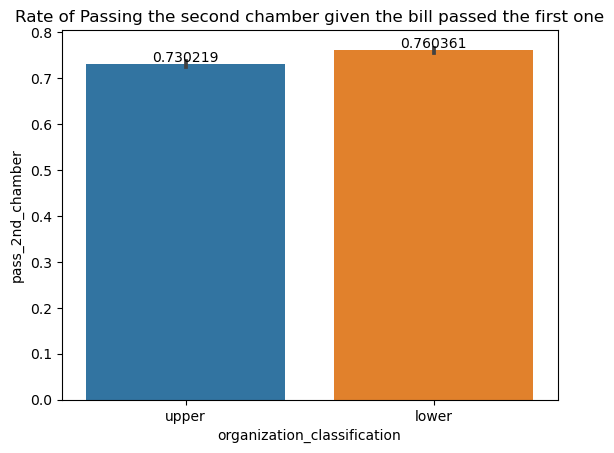

In [14]:
ax = sns.barplot(data = df[df['pass_1st_chamber'] == 1], x = 'organization_classification', y = 'pass_2nd_chamber')
ax.bar_label(ax.containers[0])
plt.title('Rate of Passing the second chamber given the bill passed the first one');

Bills that pass through the House first, are more likely to pass the Senate than the other way around. Meaning bills passed in the Senate, don't make through phase two as often.

The House seems to pass less legislation than the Senate does. 

## Bill Prefix

Each Bill has a prefix, and they have different meanings. HB stands for House Bill while SB stands for Senate Bill. This is not conventialized though and different states use different prefixes for the same thing. For example, instead of House Bill, California, along with other states, use Assembly Bill.

In [15]:
df['bill_pre'].value_counts()

HB    48612
SB    33244
HF     5708
SF     5349
AB     4658
S      3458
H       719
Name: bill_pre, dtype: int64

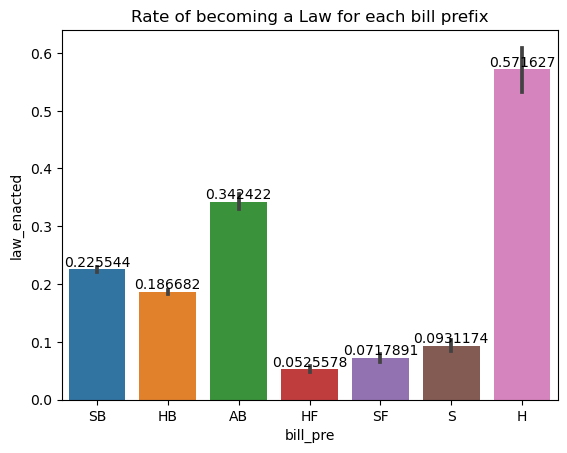

In [16]:
ax = sns.barplot(data = df, x = 'bill_pre', y = 'law_enacted')
ax.bar_label(ax.containers[0])
plt.title('Rate of becoming a Law for each bill prefix');

I don't know if we should use this feature because it seems like it is related with two columns we already have, state and organization classification. 

## Party Control

It will be interesting to see how party control for the House, Senate and Governorship for each state affects laws being passed. In order to study this though, we will first have to make some new columns for the house and senate control.

In [17]:
#Make column showing difference between Democrats and Republicans. 
#This will then be used to show the party in control
df['senate_party_diff'] = df['senate_dem'] - df['senate_rep']
df['house_party_diff'] = df['house_dem'] - df['house_rep']
#Do the same for our smaller dataset
df_with_sponsors['senate_party_diff'] = df_with_sponsors['senate_dem'] - df_with_sponsors['senate_rep']
df_with_sponsors['house_party_diff'] = df_with_sponsors['house_dem'] - df_with_sponsors['house_rep']


#Make the column showing the majority party for the senat and house for each state on the given year
df['senate_party'] = df['senate_party_diff'].map(lambda x: 'Rep' if x < 0 else 'Dem' if x > 0 else 'Split')
df['house_party'] = df['house_party_diff'].map(lambda x: 'Rep' if x < 0 else 'Dem' if x > 0 else 'Split')
#do same for smaller dataset
df_with_sponsors['senate_party'] = df_with_sponsors['senate_party_diff'].map(lambda x: 'Rep' if x < 0 else 'Dem' if x > 0 else 'Split')
df_with_sponsors['house_party'] = df_with_sponsors['house_party_diff'].map(lambda x: 'Rep' if x < 0 else 'Dem' if x > 0 else 'Split')

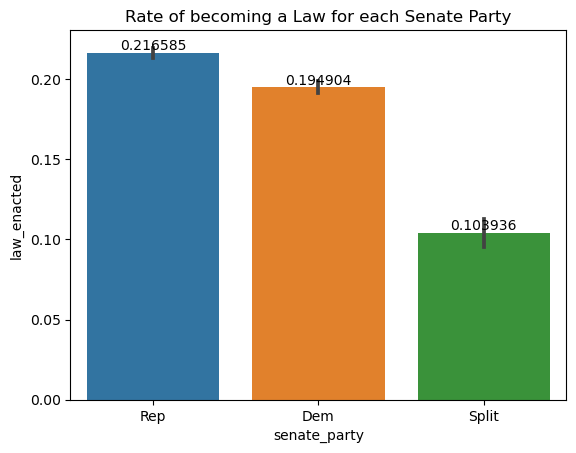

In [18]:
ax = sns.barplot(data = df, x = 'senate_party', y = 'law_enacted')
ax.bar_label(ax.containers[0])
plt.title('Rate of becoming a Law for each Senate Party');

States with republican senates are able to pass more bills. States with split senates though pass low amounts of laws though.

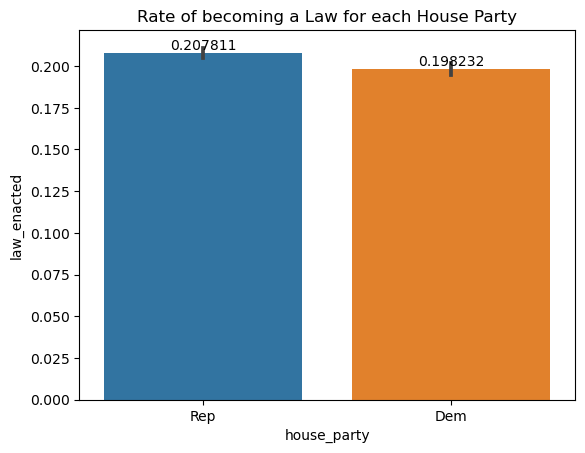

In [19]:
ax = sns.barplot(data = df, x = 'house_party', y = 'law_enacted')
ax.bar_label(ax.containers[0])
plt.title('Rate of becoming a Law for each House Party');

Very similar rates for different house parties.

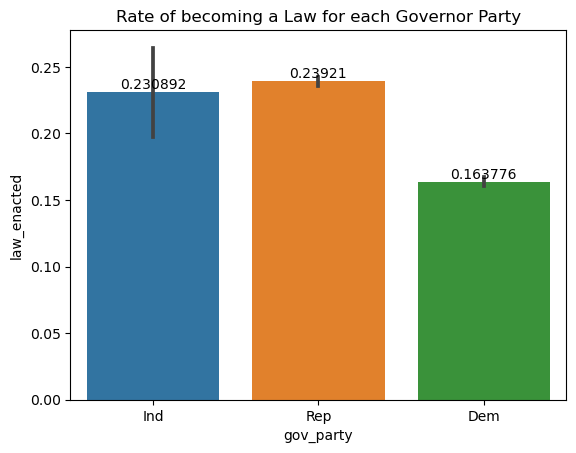

In [20]:
ax = sns.barplot(data = df, x = 'gov_party', y = 'law_enacted')
ax.bar_label(ax.containers[0])
plt.title('Rate of becoming a Law for each Governor Party');

States with democratic governors pass less laws than states with republican governors.

### Overall State control
I want to make a column describing if each part of congress and the governor align to one party or if they are mixed.

In [21]:
#Making column that is Dem if the house, Senate and Governor are all democrats. Same for republican. And if they differ, than they are "split"
df['state_party_control'] = df.apply(lambda x: 'Dem' if (x.house_party == 'Dem' and x.senate_party == 'Dem' and x.gov_party == 'Dem') else \
         ('Rep' if (x.house_party == 'Rep' and x.senate_party == 'Rep' and x.gov_party == 'Rep') else 'Split'), axis = 1)
#Do the same for smaller dataset
df_with_sponsors['state_party_control'] = df_with_sponsors.apply(lambda x: 'Dem' if (x.house_party == 'Dem' and x.senate_party == 'Dem' and x.gov_party == 'Dem') else \
         ('Rep' if (x.house_party == 'Rep' and x.senate_party == 'Rep' and x.gov_party == 'Rep') else 'Split'), axis = 1)

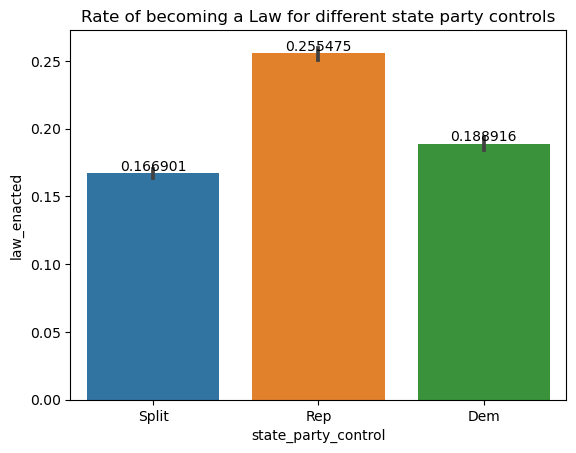

In [22]:
ax = sns.barplot(data = df, x = 'state_party_control', y = 'law_enacted')
ax.bar_label(ax.containers[0])
plt.title('Rate of becoming a Law for different state party controls');

Republican Controlled states pass bills with the highest frequency. Split states pass with the lowest frequency which makes sense, but Democrat controlled states are not much higher than split states which is interesting.

### Overall State control with party that introduced bill

In [23]:
df['state_party_control'].value_counts()

Split    45434
Rep      38810
Dem      22989
Name: state_party_control, dtype: int64

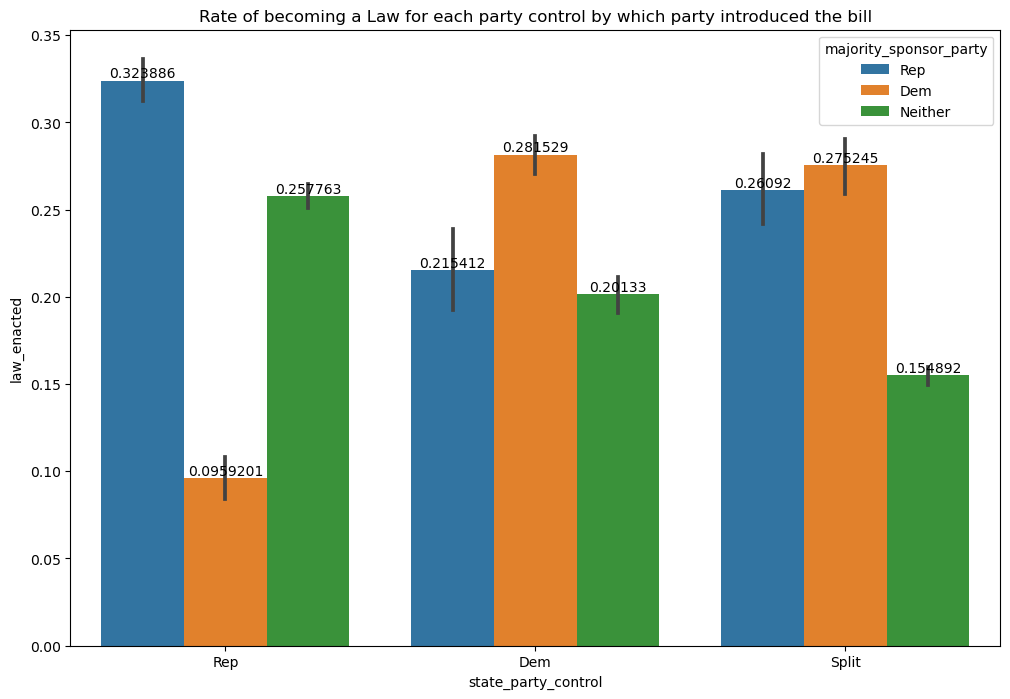

In [24]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df_with_sponsors, x = 'state_party_control', y = 'law_enacted', hue = 'majority_sponsor_party')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Rate of becoming a Law for each party control by which party introduced the bill');

As expected, a republican introduced bill in a republican state passes at very high frequency. This is also true for a democrat bill in a democrat state. Another expected result is that democrat bills in a republican state do very poorly. Interestingly enough though, this is not the case for republican bills in a democrat state. Bills from split states do better when it was sponsored by republicans or democrats than they do when they are sponsored by niether party.

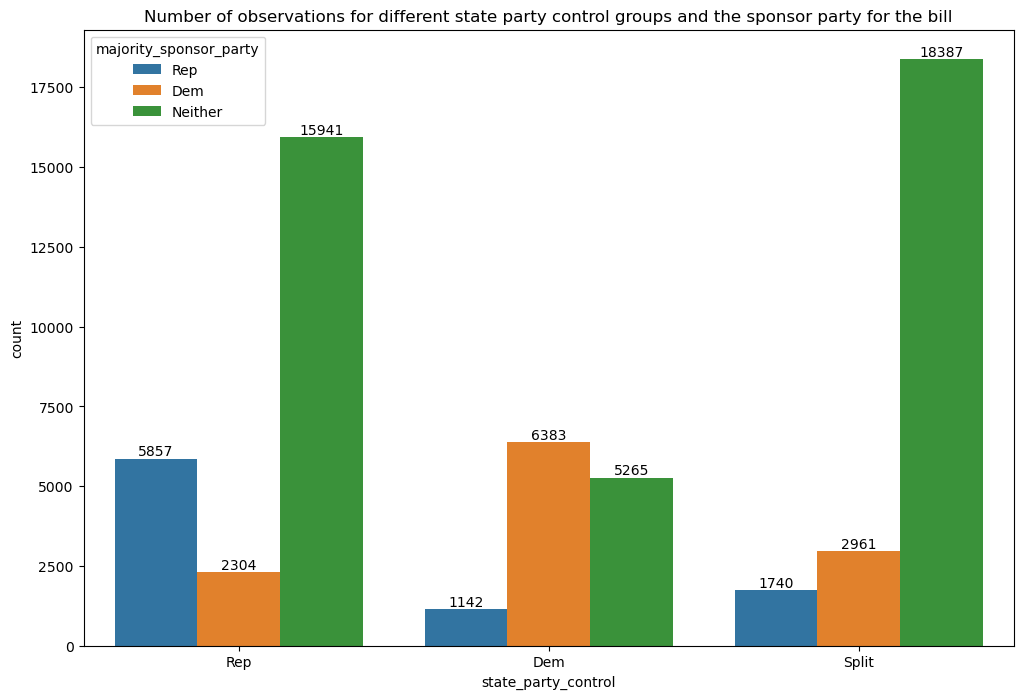

In [25]:
plt.figure(figsize = (12,8))
ax = sns.countplot(data = df_with_sponsors, x = 'state_party_control', hue = 'majority_sponsor_party')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Number of observations for different state party control groups and the sponsor party for the bill');

Over all, more peices of legislation don't have a majority sponsor party. 

### Party control of the chamber the bill was introduced in.

Wil have to make a new column for this.

In [26]:
#Function that tells us the party of the first chamber the bill is introduced in and 
#then one that tells us the party of the second chamber it will go through if it gets there.
df['party_of_1st_chamber'] = df.apply(lambda x: x.senate_party if x.organization_classification  == 'upper' else x.house_party, axis = 1)
df['party_of_2nd_chamber'] = df.apply(lambda x: x.senate_party if x.organization_classification  == 'lower' else x.house_party, axis = 1)

#Do the same for our smaller dataset
df_with_sponsors['party_of_1st_chamber'] = df_with_sponsors.apply(lambda x: x.senate_party if x.organization_classification  == 'upper' else x.house_party, axis = 1)
df_with_sponsors['party_of_2nd_chamber'] = df_with_sponsors.apply(lambda x: x.senate_party if x.organization_classification  == 'lower' else x.house_party, axis = 1)

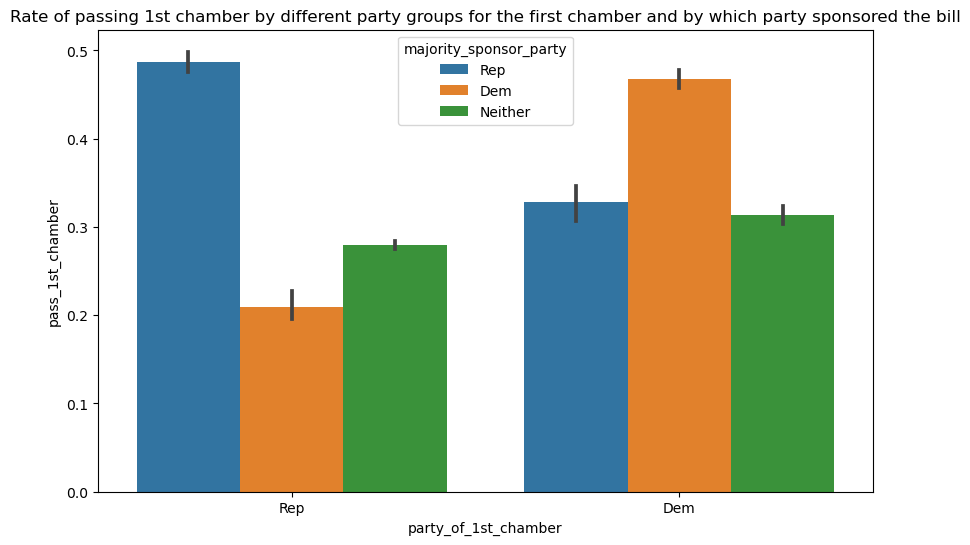

In [27]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_with_sponsors, x = 'party_of_1st_chamber', y = 'pass_1st_chamber', hue = 'majority_sponsor_party')
plt.title('Rate of passing 1st chamber by different party groups for the first chamber and by which party sponsored the bill');

Similar results that we have observed above. The party that dominates the chamber passes mor ebills introduced from there party.

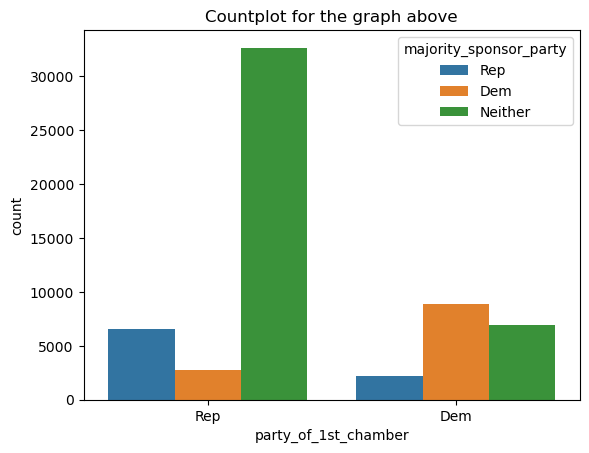

In [28]:
sns.countplot(data = df_with_sponsors, x = 'party_of_1st_chamber',hue = 'majority_sponsor_party')
plt.title('Countplot for the graph above');

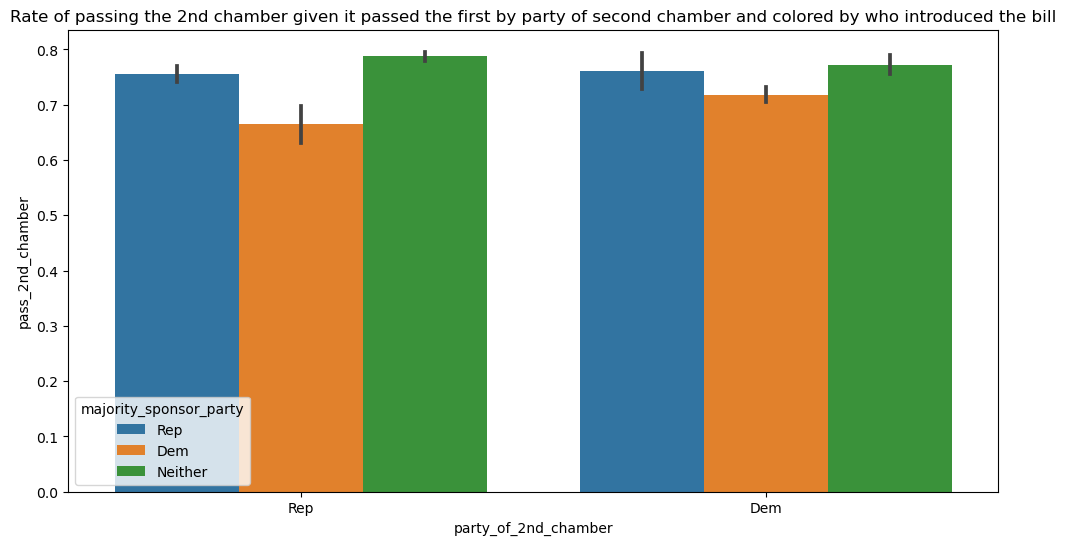

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(data = df_with_sponsors[df_with_sponsors['pass_1st_chamber'] == 1], x = 'party_of_2nd_chamber', y = 'pass_2nd_chamber', hue = 'majority_sponsor_party')
plt.title('Rate of passing the 2nd chamber given it passed the first by party of second chamber and colored by who introduced the bill');

Once a bill passes the first chamber, the second chamber seems to be less partisan. It votes equaly for either party that sponsored the bill.

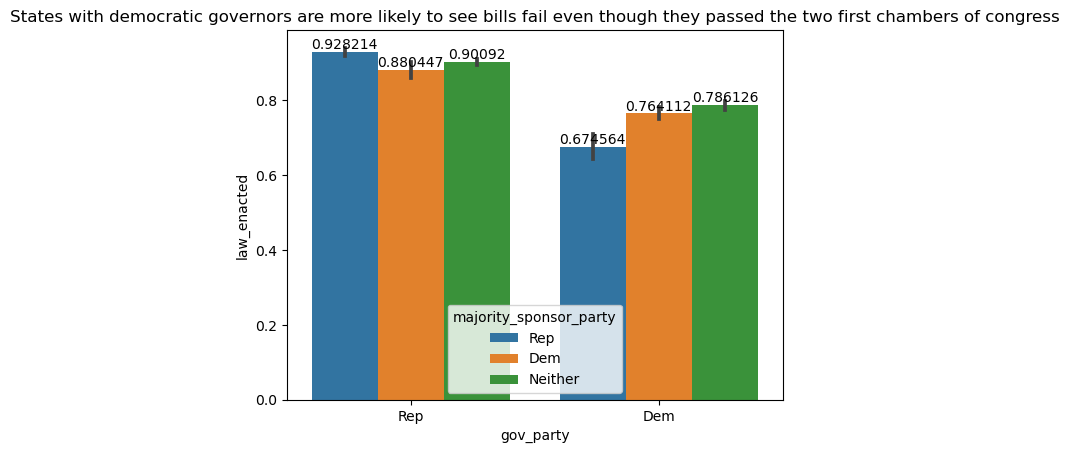

In [30]:
ax = sns.barplot(data = df_with_sponsors[df_with_sponsors.pass_2nd_chamber == 1], x = 'gov_party', y = 'law_enacted', hue = 'majority_sponsor_party')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('States with democratic governors are more likely to see bills fail even though they passed the two first chambers of congress');

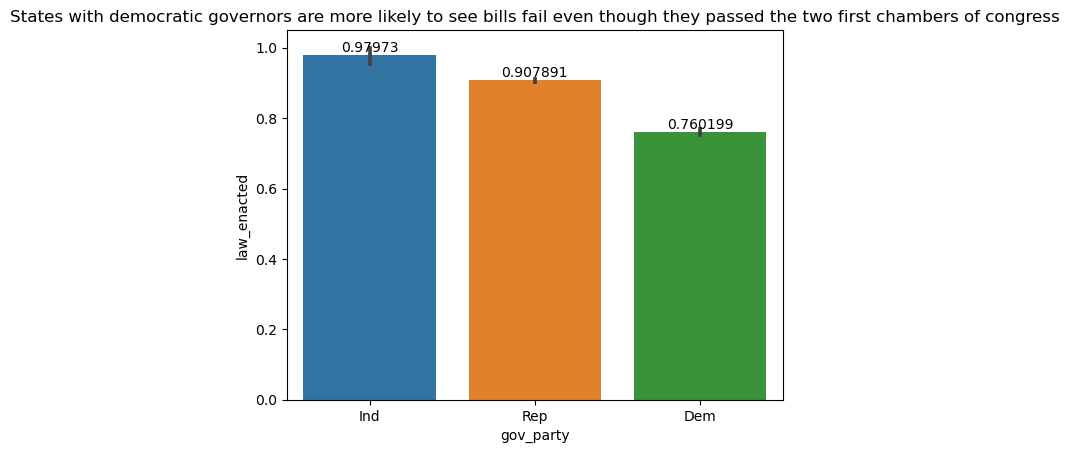

In [31]:
ax = sns.barplot(data = df[df.pass_2nd_chamber == 1], x = 'gov_party', y = 'law_enacted')
ax.bar_label(ax.containers[0])

plt.title('States with democratic governors are more likely to see bills fail even though they passed the two first chambers of congress');

# Word Count Vectorizer Columns

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize

## Title

Text(0.5, 1.0, 'Most used words in Legislative Titles')

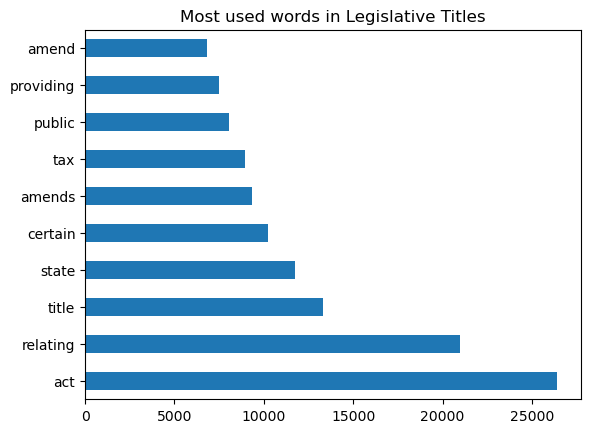

In [33]:
cv = CountVectorizer(stop_words = 'english')

title_vect = cv.fit_transform(df['title'])
title_df = pd.DataFrame(title_vect.todense(), columns = cv.get_feature_names_out())

title_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh')

plt.title('Most used words in Legislative Titles')

In [34]:
df_pass = df[df['law_enacted'] == 1]
df_failed = df[df['law_enacted'] == 0]

pass_vect = cv.fit_transform(df_pass['title'])
pass_df = pd.DataFrame(pass_vect.todense(), columns = cv.get_feature_names_out())

fail_vect = cv.fit_transform(df_failed['title'])
fail_df = pd.DataFrame(fail_vect.todense(), columns = cv.get_feature_names_out())

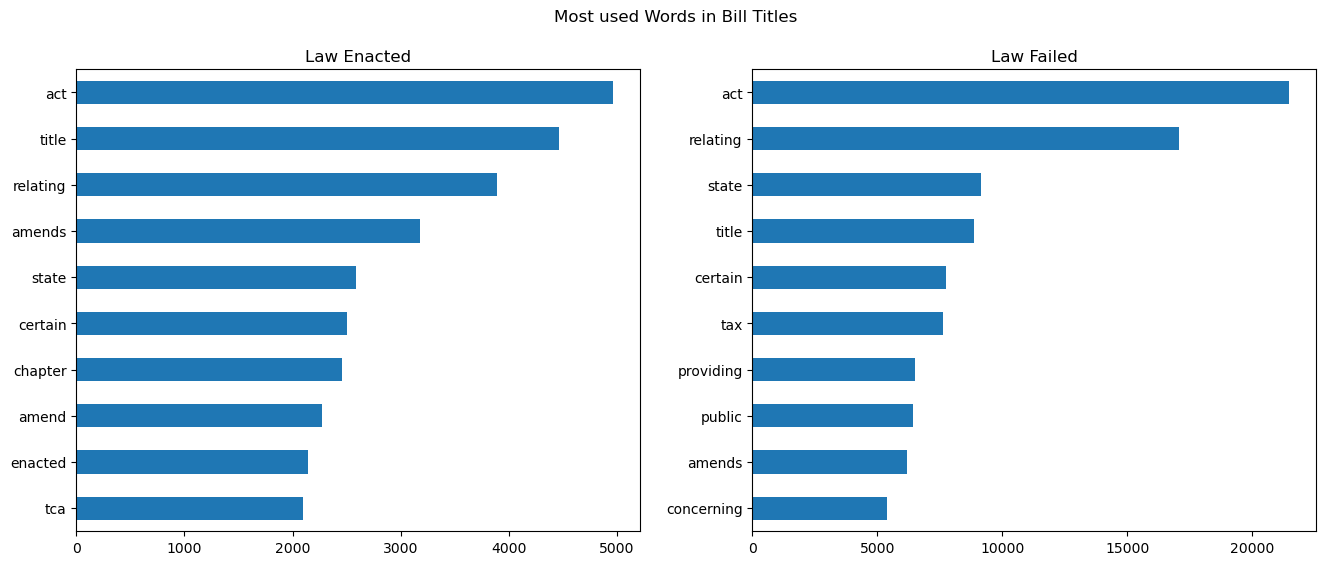

In [35]:
fig, ax = plt.subplots(1,2, figsize = (16,6))

pass_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[0])
fail_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax [1])

ax[0].invert_yaxis()
ax[1].invert_yaxis()

ax[0].set_title('Law Enacted')
ax[1].set_title('Law Failed')

fig.suptitle('Most used Words in Bill Titles');

In [36]:
df_pass = df[(df['law_enacted'] == 1) & (df['subject'].isnull() == False)]
df_failed = df[(df['law_enacted'] == 0) & (df['subject'].isnull() == False)]

pass_vect = cv.fit_transform(df_pass['subject'])
pass_df = pd.DataFrame(pass_vect.todense(), columns = cv.get_feature_names_out())

fail_vect = cv.fit_transform(df_failed['subject'])
fail_df = pd.DataFrame(fail_vect.todense(), columns = cv.get_feature_names_out())

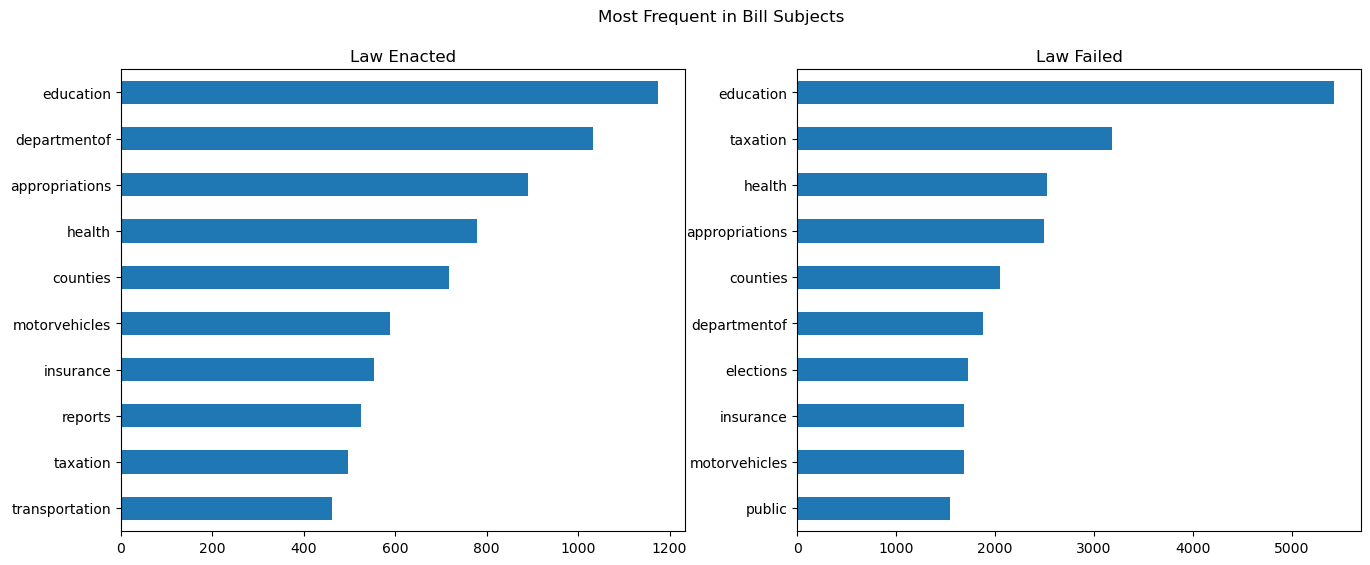

In [37]:
fig, ax = plt.subplots(1,2, figsize = (16,6))

pass_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[0])
fail_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax [1])

ax[0].invert_yaxis()
ax[1].invert_yaxis()

ax[0].set_title('Law Enacted')
ax[1].set_title('Law Failed')

fig.suptitle('Most Frequent in Bill Subjects');

# TFIDF

In [38]:
tfidf = TfidfVectorizer(stop_words='english', max_df=.9)

In [39]:
df_pass = df[df['law_enacted'] == 1]
df_failed = df[df['law_enacted'] == 0]

pass_vect = tfidf.fit_transform(df_pass['title'])
pass_df = pd.DataFrame(pass_vect.todense(), columns = tfidf.get_feature_names_out())

fail_vect = tfidf.fit_transform(df_failed['title'])
fail_df = pd.DataFrame(fail_vect.todense(), columns = tfidf.get_feature_names_out())

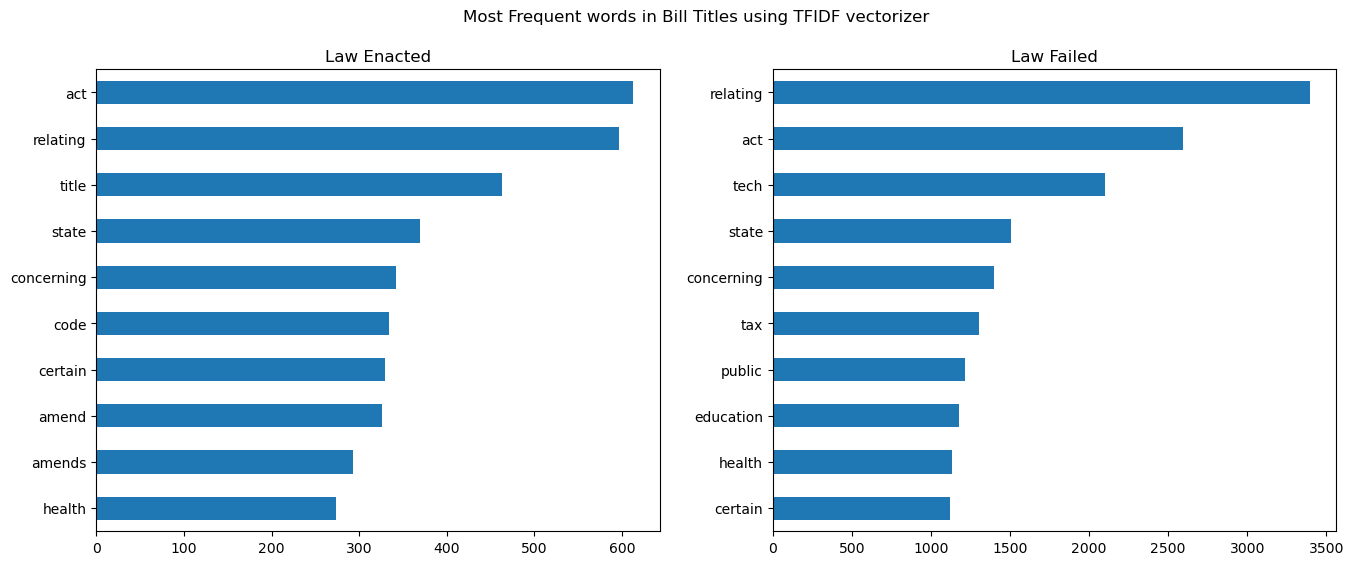

In [40]:
fig, ax = plt.subplots(1,2, figsize = (16,6))

pass_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[0])
fail_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax [1])

ax[0].invert_yaxis()
ax[1].invert_yaxis()

ax[0].set_title('Law Enacted')
ax[1].set_title('Law Failed')

fig.suptitle('Most Frequent words in Bill Titles using TFIDF vectorizer');